In [1]:
#Importing necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import seaborn as sns
%matplotlib inline

In [2]:
#Importing the dataset

df = pd.read_csv('https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv')
df.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65

In [3]:
df.keys

<bound method NDFrame.keys of      Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
495         496        332          108                  5  4.5   4.0  9.02   
496         497        337          117                  5  5.0   5.0  9.87   
497         498        330          120                  5  4.5   5.0  9.56   
498         499        312          103                  4  4.0   5.0  8.43   
499         500        327          113                  4  4.5   4.5  9.04   

     Research  Chance

In [4]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [5]:
df.drop('Serial No.',axis=1,inplace=True)

In [6]:
df.describe().T

count       mean        std     min       25%     50%  \
GRE Score          500.0  316.47200  11.295148  290.00  308.0000  317.00   
TOEFL Score        500.0  107.19200   6.081868   92.00  103.0000  107.00   
University Rating  500.0    3.11400   1.143512    1.00    2.0000    3.00   
SOP                500.0    3.37400   0.991004    1.00    2.5000    3.50   
LOR                500.0    3.48400   0.925450    1.00    3.0000    3.50   
CGPA               500.0    8.57644   0.604813    6.80    8.1275    8.56   
Research           500.0    0.56000   0.496884    0.00    0.0000    1.00   
Chance of Admit    500.0    0.72174   0.141140    0.34    0.6300    0.72   

                      75%     max  
GRE Score          325.00  340.00  
TOEFL Score        112.00  120.00  
University Rating    4.00    5.00  
SOP                  4.00    5.00  
LOR                  4.00    5.00  
CGPA                 9.04    9.92  
Research             1.00    1.00  
Chance of Admit      0.82    0.97

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [8]:
#Finding out the null values
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [9]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [10]:
df.corr()

GRE Score  TOEFL Score  University Rating       SOP  \
GRE Score           1.000000     0.827200           0.635376  0.613498   
TOEFL Score         0.827200     1.000000           0.649799  0.644410   
University Rating   0.635376     0.649799           1.000000  0.728024   
SOP                 0.613498     0.644410           0.728024  1.000000   
LOR                 0.524679     0.541563           0.608651  0.663707   
CGPA                0.825878     0.810574           0.705254  0.712154   
Research            0.563398     0.467012           0.427047  0.408116   
Chance of Admit     0.810351     0.792228           0.690132  0.684137   

                       LOR       CGPA  Research  Chance of Admit   
GRE Score          0.524679  0.825878  0.563398          0.810351  
TOEFL Score        0.541563  0.810574  0.467012          0.792228  
University Rating  0.608651  0.705254  0.427047          0.690132  
SOP                0.663707  0.712154  0.408116          0.684137  
LOR                1.000000  0.637469  0.372526          0.645365  
CGPA               0.637469  1.000000  0.501311          0.882413  
Research           0.372526  0.501311  1.000000          0.545871  
Chance of Admit    0.645365  0.882413  0.545871          1.000000

<AxesSubplot:>

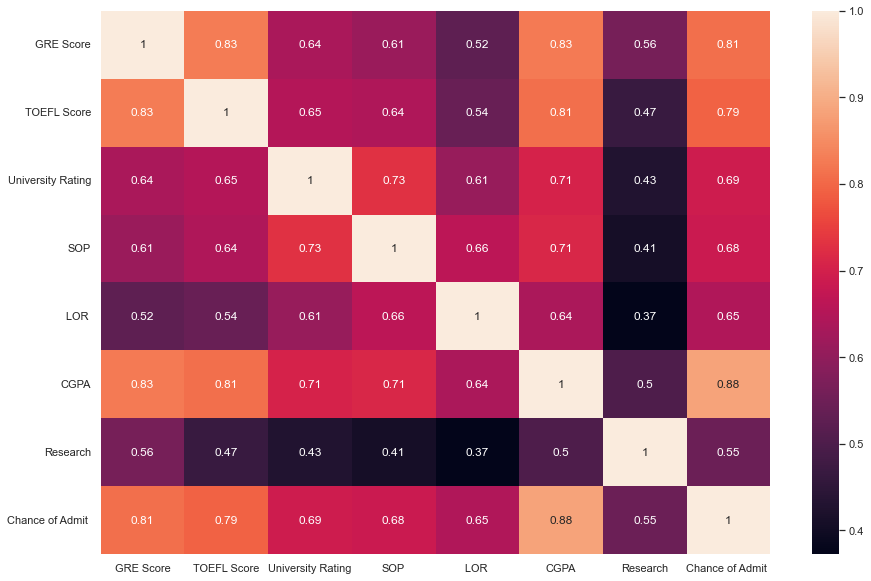

In [11]:
#Heatmap

sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.corr(),annot=True)

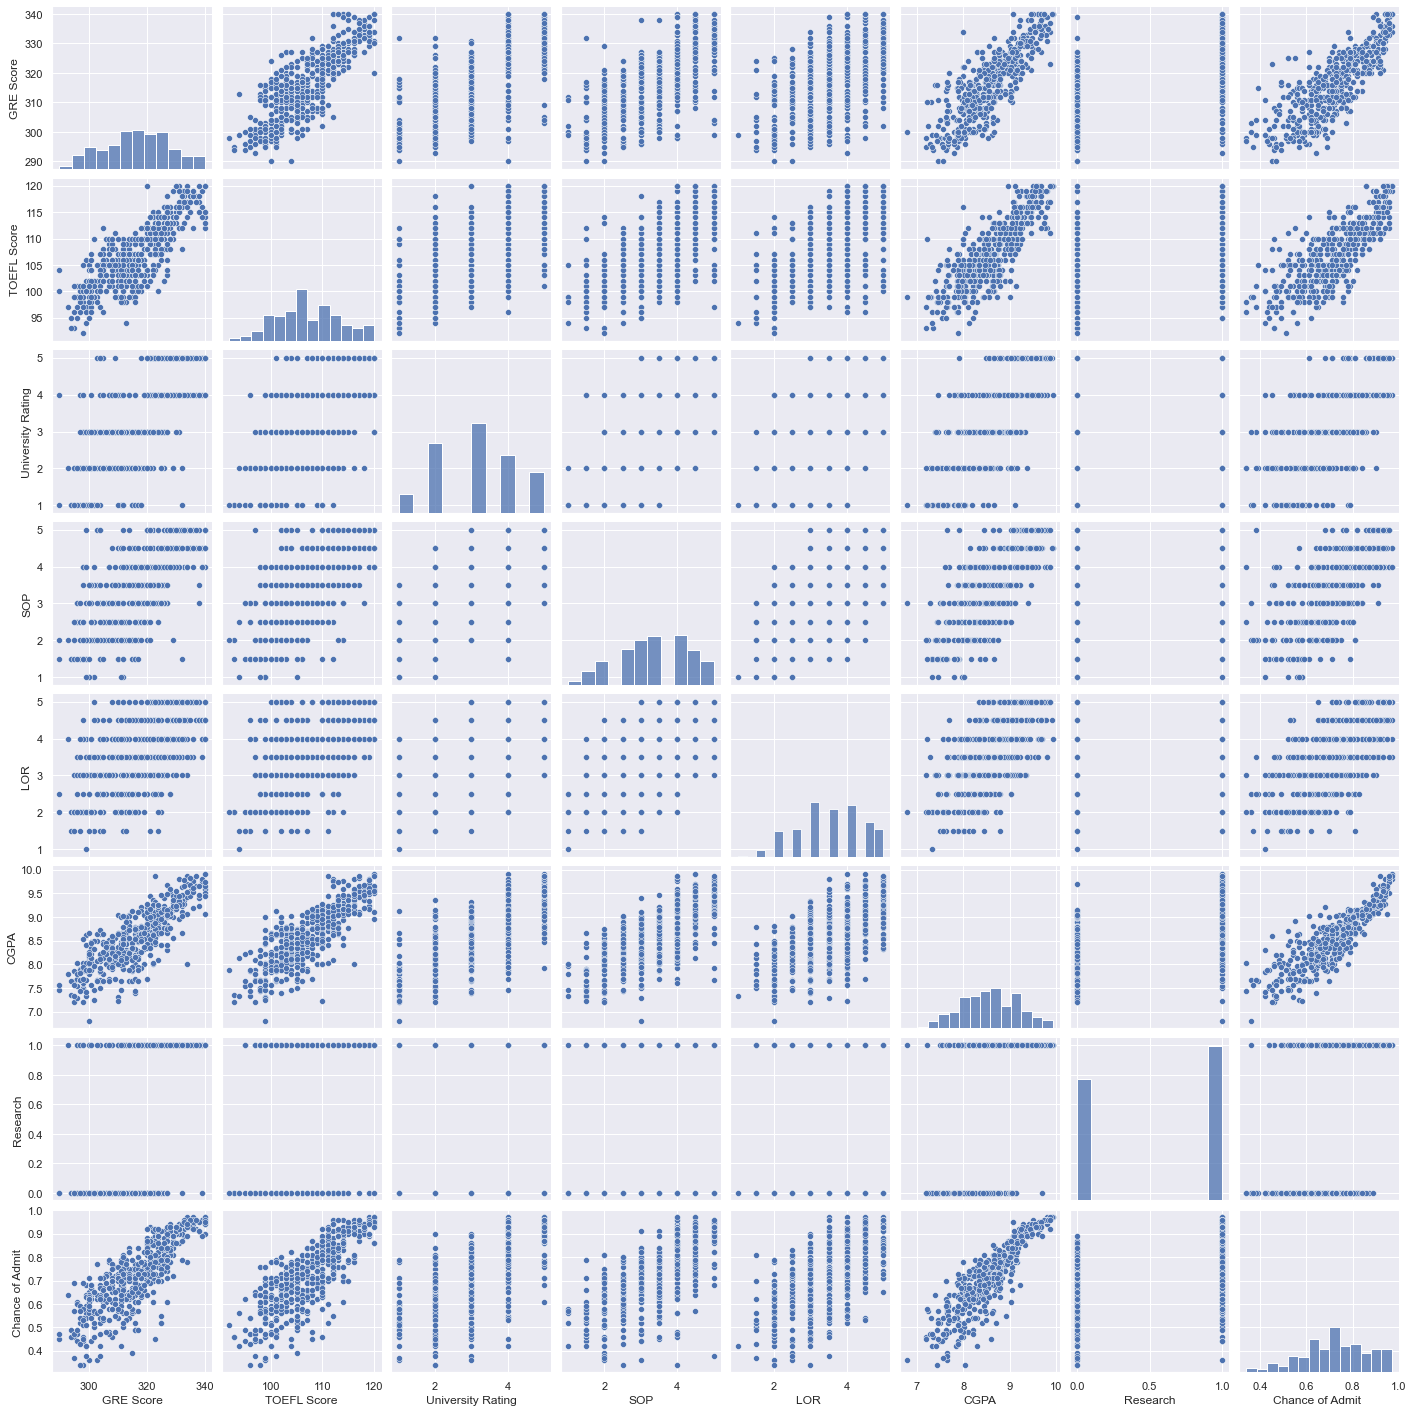

In [12]:
sns.pairplot(df)

In [13]:
df.rename({'Chance of Admit ': 'Chance of Admit', 'LOR ':'LOR'}, axis=1, inplace=True)

<AxesSubplot:>

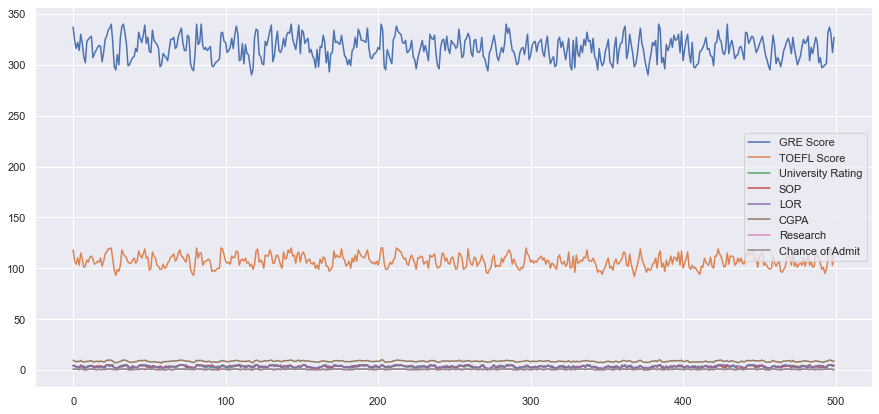

In [14]:
#graph all the data set - just for looking
df.plot(figsize=(15,7))

C:\Users\Shobhandeb\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CGPA', ylabel='Density'>

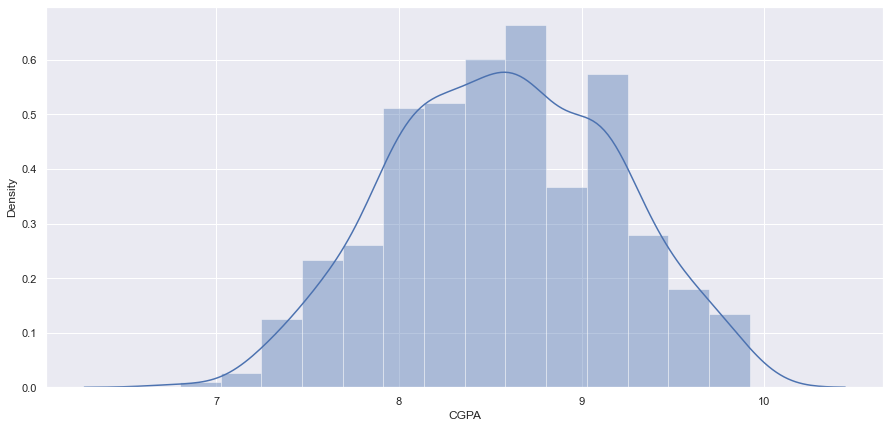

In [15]:
plt.figure(figsize=(15,7))
sns.distplot(df['CGPA'])

<AxesSubplot:xlabel='CGPA', ylabel='Chance of Admit'>

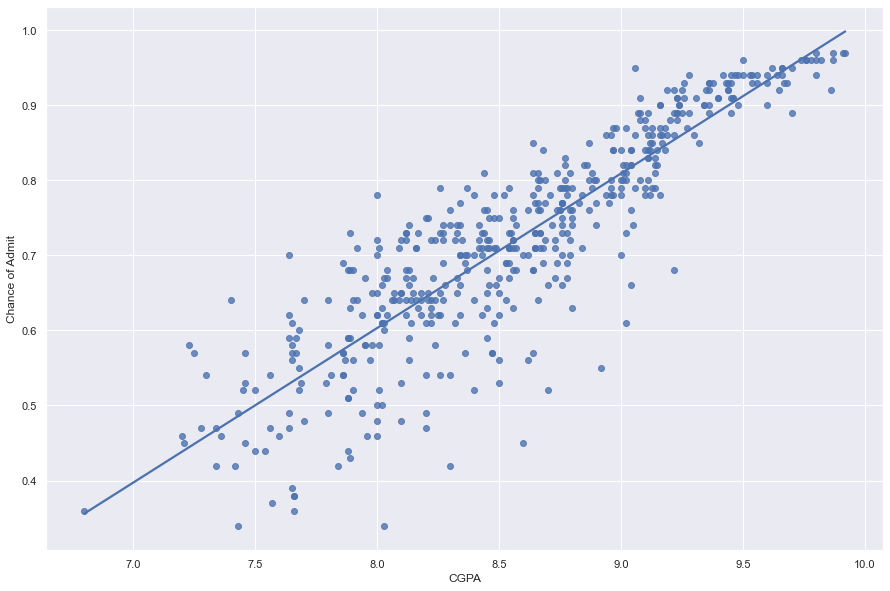

In [16]:
sns.regplot(x='CGPA',y='Chance of Admit',data=df,ci=None)

<AxesSubplot:xlabel='TOEFL Score', ylabel='Chance of Admit'>

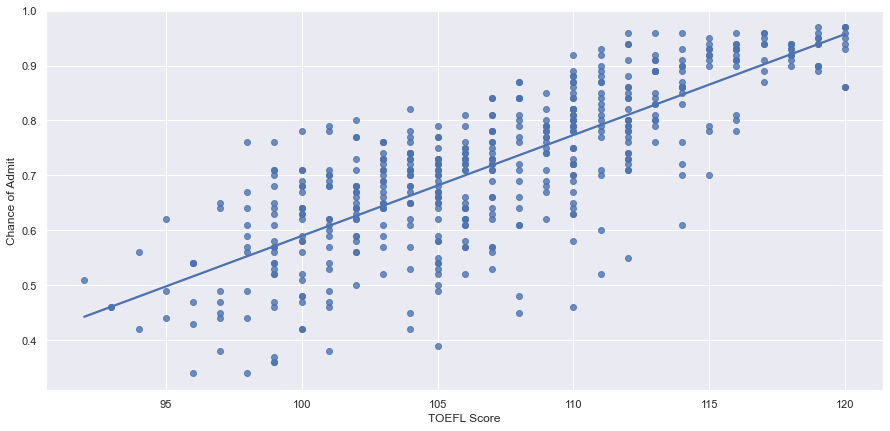

In [17]:
plt.figure(figsize=(15,7))
sns.regplot(x='TOEFL Score',y='Chance of Admit',data=df,ci=None)

In [18]:
import plotly.graph_objects as go
import plotly.express as px

px.scatter(df, x="TOEFL Score", y="GRE Score",animation_frame="Chance of Admit")

In [19]:
from sklearn.svm import SVC,SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score

In [20]:
#Defined X value and y value , and split the data train
X = df[['CGPA','GRE Score','TOEFL Score','Research']]
y = df[['Chance of Admit']]

In [21]:
# Split data for test and train the model.
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=.20)

In [22]:
# x shape
X.shape

(500, 4)

In [23]:
# x_train shape 80% of data from x - 20% other data for test
X_train.shape

(400, 4)

In [24]:
# x_train first five rows:
X_train.head()

CGPA  GRE Score  TOEFL Score  Research
107  9.46        338          117         1
336  8.79        319          110         0
71   9.76        336          112         1
474  7.95        308          105         1
6    8.20        321          109         1

In [25]:
# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (375, 4)
X Test  :  (125, 4)
Y Train :  (375, 1)
Y Test  :  (125, 1)


In [26]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
scaler = StandardScaler()

In [27]:
X_train_scaled = scaler.fit_transform(X_train)

In [28]:
X_test_scaled = scaler.transform(X_test)

In [29]:
svr = SVR()

In [30]:
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

C:\Users\Shobhandeb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Text(0, 0.5, 'Test Predicted Data')

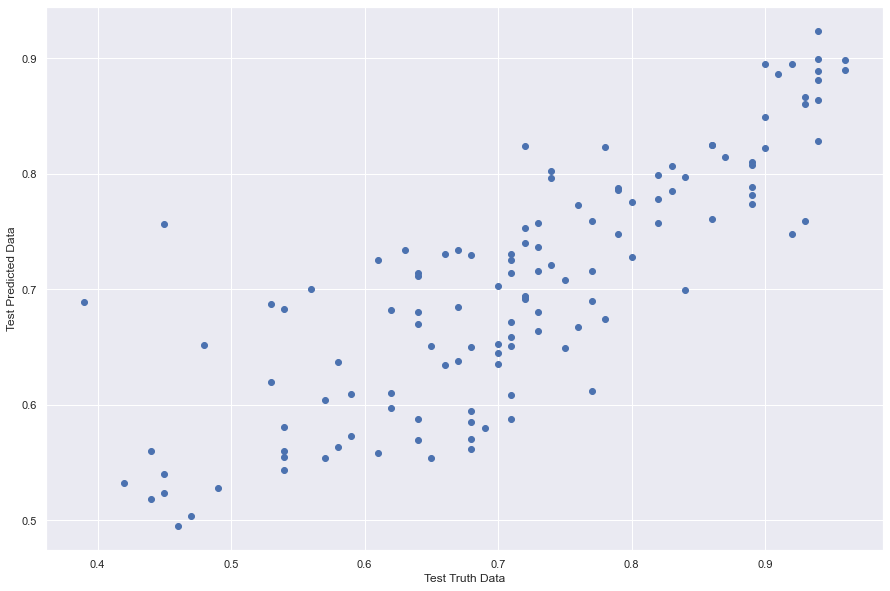

In [31]:
plt.scatter(y_test,y_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

C:\Users\Shobhandeb\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Chance of Admit'>

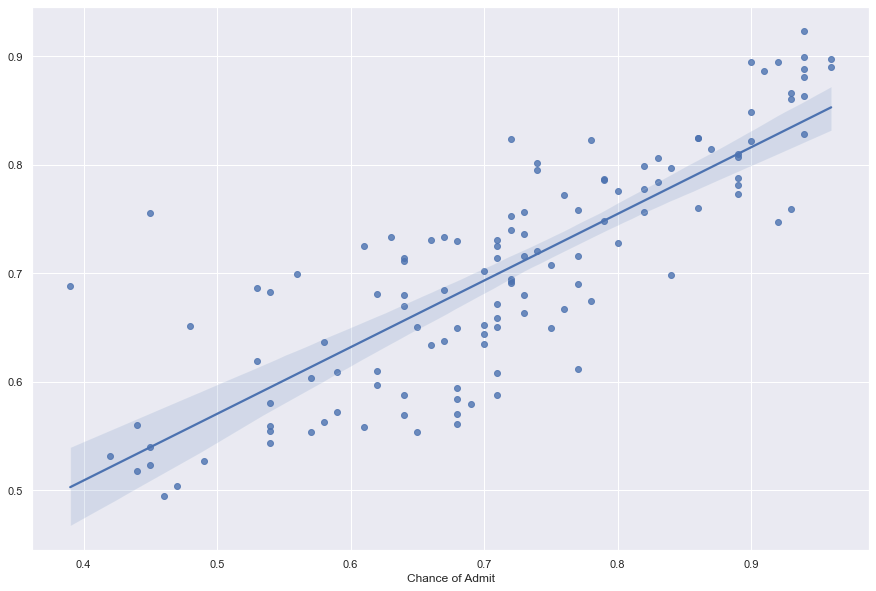

In [32]:
sns.regplot(y_test,y_pred)

In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.00663873199363157
0.06353916445318326
0.08147841428029617


In [34]:
print('-----------Without Scaled Data---------------------')
from sklearn.metrics import r2_score
svr_score=r2_score(y_test,y_pred)
print(svr_score)

-----------Without Scaled Data---------------------
0.659931575325714


In [35]:
## Adjusted R square
#display adjusted R-squared
1 - (1-svr_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6485959611699045

In [36]:
svr.fit(X_train_scaled, y_train)
y_pred_scaled = svr.predict(X_test_scaled)

C:\Users\Shobhandeb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Text(0, 0.5, 'Test Predicted Data')

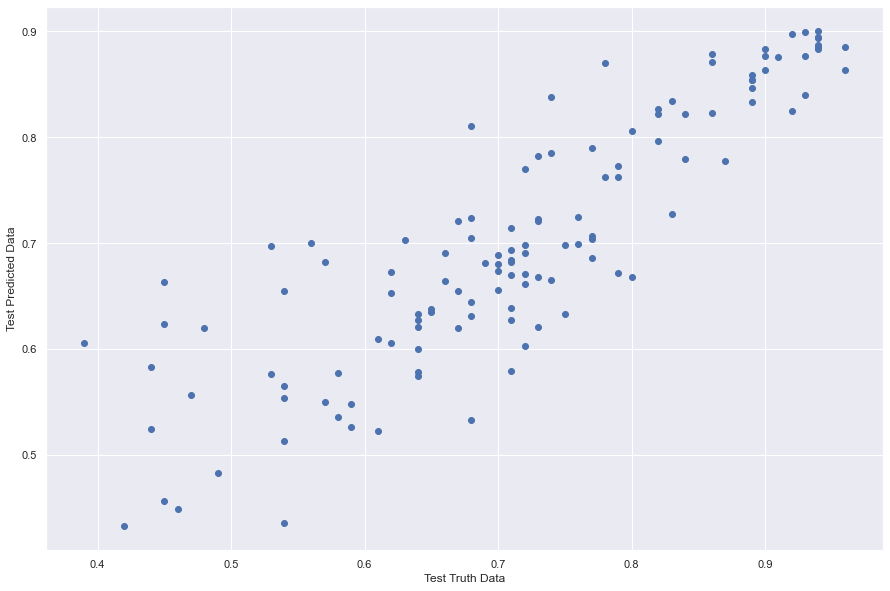

In [37]:
plt.scatter(y_test,y_pred_scaled)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

C:\Users\Shobhandeb\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Chance of Admit'>

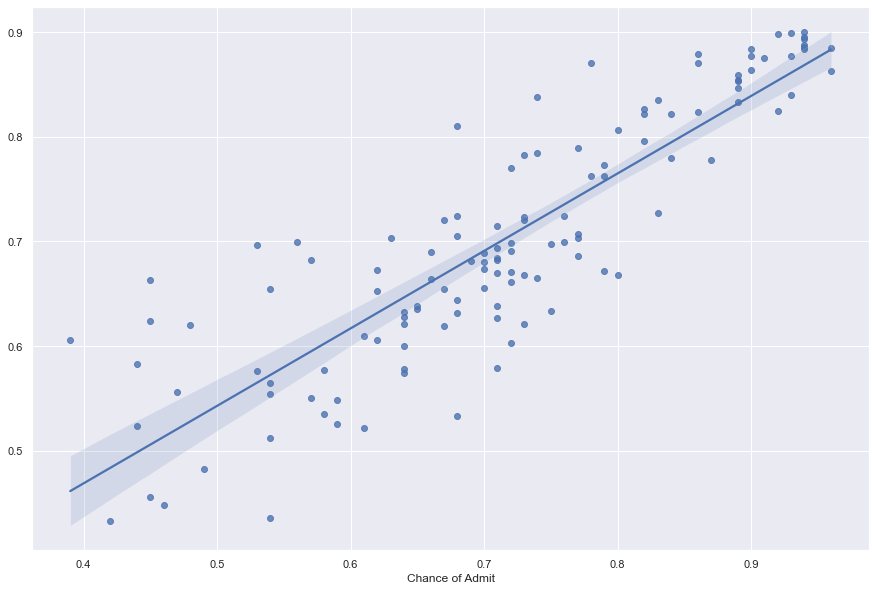

In [38]:
sns.regplot(y_test,y_pred_scaled)

In [39]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,y_pred_scaled))
print(mean_absolute_error(y_test,y_pred_scaled))
print(np.sqrt(mean_squared_error(y_test,y_pred_scaled)))

0.0049102705508261985
0.05395611691372177
0.0700733226757958


In [40]:
print('--------------With Scaled Data-----------------------')
from sklearn.metrics import r2_score
svr_score_scaled=r2_score(y_test,y_pred_scaled)
print(svr_score_scaled)

--------------With Scaled Data-----------------------
0.7484718508676291


In [41]:
## Adjusted R square
#display adjusted R-squared
1 - (1-svr_score_scaled)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7400875792298834